In [17]:
!pip show fastai --version 

Name: fastai
Version: 2.8.4
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: cloudpickle, fastcore, fastdownload, fastprogress, fasttransform, matplotlib, packaging, pandas, pillow, pip, plum-dispatch, pyyaml, requests, scikit-learn, scipy, spacy, torch, torchvision
Required-by: 


In [6]:
from fastai.vision.all import * 

/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` 

In [14]:
path = untar_data(URLs.CAMVID_TINY)

In [15]:
dls = SegmentationDataLoaders.from_label_func(
    path, 
    bs=8, 
    fnames = get_image_files(path/"images"), 
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [21]:
# First, load the codes to identify the Void/background class
codes = np.loadtxt(path/'codes.txt', dtype=str)
name2id = {v: k for k, v in enumerate(codes)}
void_code = name2id.get('Void', -1) 

# Define foreground accuracy (ignores background pixels)
def foreground_acc(inp, targ, bkg_idx=void_code, axis=1):
    "Compute accuracy excluding background class"
    targ = targ.squeeze(axis)
    mask = targ != bkg_idx
    return (inp.argmax(dim=axis)[mask] == targ[mask]).float().mean()

In [16]:
learn = unet_learner(dls, resnet34, metrics=foreground_acc)
# learn = unet_learner(dls, resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 154MB/s]


In [23]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,foreground_acc,time
0,2.603520,2.077189,0.351601,00:42


epoch,train_loss,valid_loss,foreground_acc,time
0,1.568897,1.454909,0.623255,00:46
1,1.432755,1.358627,0.635087,00:46
2,1.452453,1.440928,0.625822,00:46
3,1.348895,1.223136,0.661395,00:46
4,1.230538,1.060637,0.716592,00:49
5,1.118571,1.012652,0.737787,00:46
6,1.023578,0.943306,0.767837,00:46
7,0.947900,0.947365,0.769571,00:46


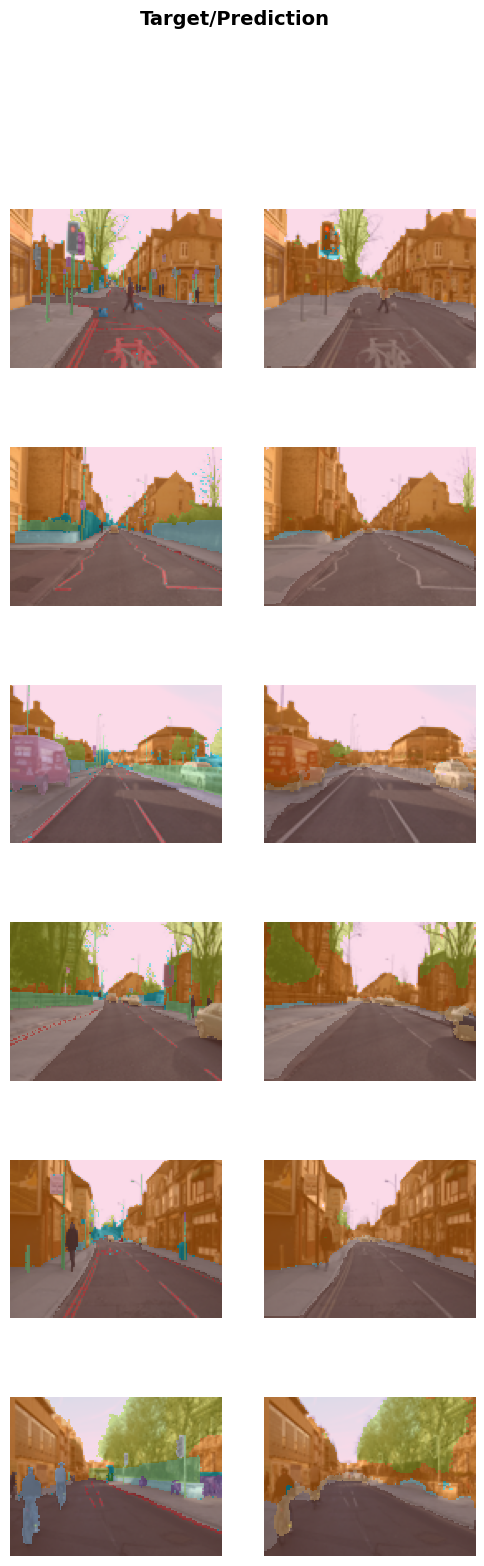

In [24]:
learn.show_results(max_n=6)

In [21]:
doc(dls.bs)